Re-Clustering Brands using Model Template - refit model to 2024 version.
Data Scope: 
- YTD 2024 (Jan-May 2024)

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Source for DT-fitting cluster engineering: http://localhost:8888/notebooks/Downloads/Beauty%20Persona%20Clustering-Copy1.ipynb

# Identify outliers in data

In [5]:
file_path = r'C:\Users\tiara.santoso\Downloads\Data Exports\20240604 - Data Cluster Original for Brands.xlsx'

sheet_name = 'New'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head()
data = df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 117 entries, store_alias to you beauty
dtypes: float64(116), object(1)
memory usage: 64.1+ KB


In [7]:
df.head(20)

,store_alias,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
0,SAB,0.000510,0.0,0.000000,0.010700,0.010766,0.025020,0.000000,0.024236,0.006206,...,0.004351,0.000000,0.000131,0.013575,0.000000,0.012464,0.000000,0.000000,0.006402,0.007918
1,SAG,0.000350,0.0,0.000000,0.008516,0.012361,0.032633,0.000000,0.033841,0.000000,...,0.004862,0.000000,0.000508,0.022465,0.000000,0.013949,0.000000,0.003877,0.008134,0.016269
2,SAS,0.000781,0.0,0.000000,0.015225,0.013521,0.032677,0.000000,0.031327,0.003883,...,0.005233,0.000000,0.000308,0.000000,0.000000,0.024886,0.000000,0.000000,0.006819,0.012431
3,SAY,0.000516,0.0,0.000000,0.011128,0.017000,0.034535,0.000000,0.035131,0.000000,...,0.003432,0.000000,0.000595,0.003452,0.000000,0.020451,0.000000,0.000000,0.006784,0.020987
4,SBB,0.000211,0.0,0.000000,0.018252,0.010605,0.031815,0.000000,0.032026,0.000000,...,0.006295,0.000000,0.000718,0.007478,0.000000,0.020492,0.000000,0.000000,0.006971,0.019520
5,SBE,0.000738,0.0,0.000000,0.005303,0.012053,0.035282,0.000000,0.029478,0.000000,...,0.003994,0.004690,0.000278,0.000000,0.000000,0.016131,0.000000,0.000000,0.007140,0.011608
6,SBK,0.000177,0.0,0.000000,0.009203,0.011455,0.034790,0.000000,0.042610,0.000000,...,0.004522,0.000000,0.000177,0.000000,0.000000,0.030038,0.000000,0.000000,0.009894,0.016189
7,SBM,0.000167,0.0,0.000000,0.007360,0.010138,0.033969,0.000000,0.038802,0.000000,...,0.003722,0.000000,0.000417,0.055356,0.000000,0.008666,0.000000,0.005972,0.008555,0.020832
8,SBP,0.000667,0.0,0.000000,0.005339,0.010901,0.042492,0.000000,0.057620,0.003782,...,0.003337,0.000000,0.000000,0.000000,0.000000,0.014238,0.004227,0.000000,0.000000,0.014238
9,SBQ,0.000181,0.0,0.000000,0.010850,0.009403,0.040868,0.000000,0.032550,0.004521,...,0.002170,0.000000,0.000000,0.029295,0.004521,0.022423,0.000000,0.000000,0.008137,0.014286


Checking data variance first to see whether standardization is necessary.

Color distribution is here: https://docs.google.com/spreadsheets/d/1j04rtk_0YUxU2BJWa1eKJL5UWnEnqptM-tw84fVtKhA/edit#gid=743701418 ('11 June - outliers for YTD 2024 data)


In [26]:
#compute values of data variance

data = df.drop(columns=['store_alias'])
print(data.var())

acwell        1.699578e-07
ahc           1.600880e-11
anessa        2.409807e-06
ariul         6.674610e-05
avoskin       6.777766e-06
                  ...     
vaseline      2.788646e-05
verites       5.344489e-07
wardah        2.089076e-06
whitelab      4.346929e-06
you beauty    2.167543e-05
Length: 116, dtype: float64


In [27]:
variances = data.var()
variances_readable = variances.apply(lambda x: '{:.6f}'.format(x))

variances_sorted = variances_readable.sort_values(ascending=False)
print(variances_sorted)

breylee           0.000677
skintific         0.000497
the originote     0.000208
cosrx             0.000109
rojukiss          0.000101
                    ...   
momopuri          0.000000
note cosmetics    0.000000
o.two.o           0.000000
pond's            0.000000
like im five      0.000000
Length: 116, dtype: object


Ok, so these results show that there's a large discrepancy between min and max values - standardization will be beneficial so all brands contribute equally.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns)
data_standardized_df.head()

,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,beauty secrets,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
0,-0.136655,-0.120386,-0.449455,-0.164039,-0.576039,-0.892700,-0.120386,-0.929106,1.458074,-0.120386,...,0.198167,-0.301054,-0.395842,0.025938,-0.171087,-0.790883,-0.171423,-0.330062,-0.308241,-1.308048
1,-0.527601,-0.120386,-0.449455,-0.433374,0.040977,0.232695,-0.120386,0.193965,-0.736425,-0.120386,...,0.560079,-0.301054,0.019245,0.646527,-0.171087,-0.507621,-0.171423,2.371386,0.528726,0.498713
2,0.527531,-0.120386,-0.449455,0.393827,0.489750,0.239114,-0.120386,-0.099964,0.636753,-0.120386,...,0.823159,-0.301054,-0.201161,-0.921645,-0.171087,1.578433,-0.171423,-0.330062,-0.106545,-0.331524
3,-0.121492,-0.120386,-0.449455,-0.111288,1.835863,0.513880,-0.120386,0.344786,-0.736425,-0.120386,...,-0.452839,-0.301054,0.114505,-0.680710,-0.171087,0.732555,-0.171423,-0.330062,-0.123634,1.519440
4,-0.865424,-0.120386,-0.449455,0.767021,-0.638218,0.111763,-0.120386,-0.018182,-0.736425,-0.120386,...,1.575763,-0.301054,0.249851,-0.399614,-0.171087,0.740246,-0.171423,-0.330062,-0.033131,1.202058


In [29]:
# Re-attach the 'store_alias column

data_standardized_df['store_alias'] = df['store_alias'].values
cols = ['store_alias'] + [col for col in data_standardized_df.columns if col != 'store_alias']
data_standardized_df = data_standardized_df[cols]

data_standardized_df.head()

,store_alias,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
0,SAB,-0.136655,-0.120386,-0.449455,-0.164039,-0.576039,-0.892700,-0.120386,-0.929106,1.458074,...,0.198167,-0.301054,-0.395842,0.025938,-0.171087,-0.790883,-0.171423,-0.330062,-0.308241,-1.308048
1,SAG,-0.527601,-0.120386,-0.449455,-0.433374,0.040977,0.232695,-0.120386,0.193965,-0.736425,...,0.560079,-0.301054,0.019245,0.646527,-0.171087,-0.507621,-0.171423,2.371386,0.528726,0.498713
2,SAS,0.527531,-0.120386,-0.449455,0.393827,0.489750,0.239114,-0.120386,-0.099964,0.636753,...,0.823159,-0.301054,-0.201161,-0.921645,-0.171087,1.578433,-0.171423,-0.330062,-0.106545,-0.331524
3,SAY,-0.121492,-0.120386,-0.449455,-0.111288,1.835863,0.513880,-0.120386,0.344786,-0.736425,...,-0.452839,-0.301054,0.114505,-0.680710,-0.171087,0.732555,-0.171423,-0.330062,-0.123634,1.519440
4,SBB,-0.865424,-0.120386,-0.449455,0.767021,-0.638218,0.111763,-0.120386,-0.018182,-0.736425,...,1.575763,-0.301054,0.249851,-0.399614,-0.171087,0.740246,-0.171423,-0.330062,-0.033131,1.202058


Let's run the K-NN algorithm.

In [30]:
pivot_df = data_standardized_df.set_index('store_alias', inplace=True)

AttributeError: 'NoneType' object has no attribute 'head'

In [32]:
print(data_standardized_df)

               acwell       ahc    anessa     ariul   avoskin   azarine  \
store_alias                                                               
SAB         -0.136655 -0.120386 -0.449455 -0.164039 -0.576039 -0.892700   
SAG         -0.527601 -0.120386 -0.449455 -0.433374  0.040977  0.232695   
SAS          0.527531 -0.120386 -0.449455  0.393827  0.489750  0.239114   
SAY         -0.121492 -0.120386 -0.449455 -0.111288  1.835863  0.513880   
SBB         -0.865424 -0.120386 -0.449455  0.767021 -0.638218  0.111763   
...               ...       ...       ...       ...       ...       ...   
SSS         -0.188511 -0.120386 -0.449455  0.428188 -1.361994 -1.165718   
STB         -0.562999 -0.120386 -0.449455 -0.377176 -0.391617  0.595278   
STM         -0.971094 -0.120386 -0.449455 -0.449921 -0.342922 -1.437173   
STP          0.044930 -0.120386 -0.449455 -0.420122  0.882919  0.782033   
STS         -0.120779 -0.120386 -0.449455 -0.434890 -0.079779  0.025534   

             banana boat

In [33]:
pivot_df = data_standardized_df
pivot_df.head()

,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,beauty secrets,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
store_alias,,,,,,,,,,,,,,,,,,,,,
SAB,-0.136655,-0.120386,-0.449455,-0.164039,-0.576039,-0.892700,-0.120386,-0.929106,1.458074,-0.120386,...,0.198167,-0.301054,-0.395842,0.025938,-0.171087,-0.790883,-0.171423,-0.330062,-0.308241,-1.308048
SAG,-0.527601,-0.120386,-0.449455,-0.433374,0.040977,0.232695,-0.120386,0.193965,-0.736425,-0.120386,...,0.560079,-0.301054,0.019245,0.646527,-0.171087,-0.507621,-0.171423,2.371386,0.528726,0.498713
SAS,0.527531,-0.120386,-0.449455,0.393827,0.489750,0.239114,-0.120386,-0.099964,0.636753,-0.120386,...,0.823159,-0.301054,-0.201161,-0.921645,-0.171087,1.578433,-0.171423,-0.330062,-0.106545,-0.331524
SAY,-0.121492,-0.120386,-0.449455,-0.111288,1.835863,0.513880,-0.120386,0.344786,-0.736425,-0.120386,...,-0.452839,-0.301054,0.114505,-0.680710,-0.171087,0.732555,-0.171423,-0.330062,-0.123634,1.519440
SBB,-0.865424,-0.120386,-0.449455,0.767021,-0.638218,0.111763,-0.120386,-0.018182,-0.736425,-0.120386,...,1.575763,-0.301054,0.249851,-0.399614,-0.171087,0.740246,-0.171423,-0.330062,-0.033131,1.202058


Let's try computing pairwise distances - calculate distances between all stores (using Euclidean, Manhattan, or cosine distance)

Note:
Euclidean --> sensitive to scale of data, straight-line
Manhattan --> distances along axes at right angles, not as sensitive to outliers compared to Eu
Cosine --> cos of angle between vectors, focusing on direction not magnitude - useful when magnitude of vectors varies

In [36]:
from sklearn.metrics import pairwise_distances

distances_euclidean = pairwise_distances(pivot_df, metric='euclidean')
distances_manhattan = pairwise_distances(pivot_df, metric='manhattan')
distances_cosine = pairwise_distances(pivot_df, metric='cosine')

# array to dataframes
distances_euclidean_df = pd.DataFrame(distances_euclidean, index=pivot_df.index, columns=pivot_df.index)
distances_manhattan_df = pd.DataFrame(distances_manhattan, index=pivot_df.index, columns=pivot_df.index)
distances_cosine_df = pd.DataFrame(distances_cosine, index=pivot_df.index, columns=pivot_df.index)


In [37]:
import seaborn as sns

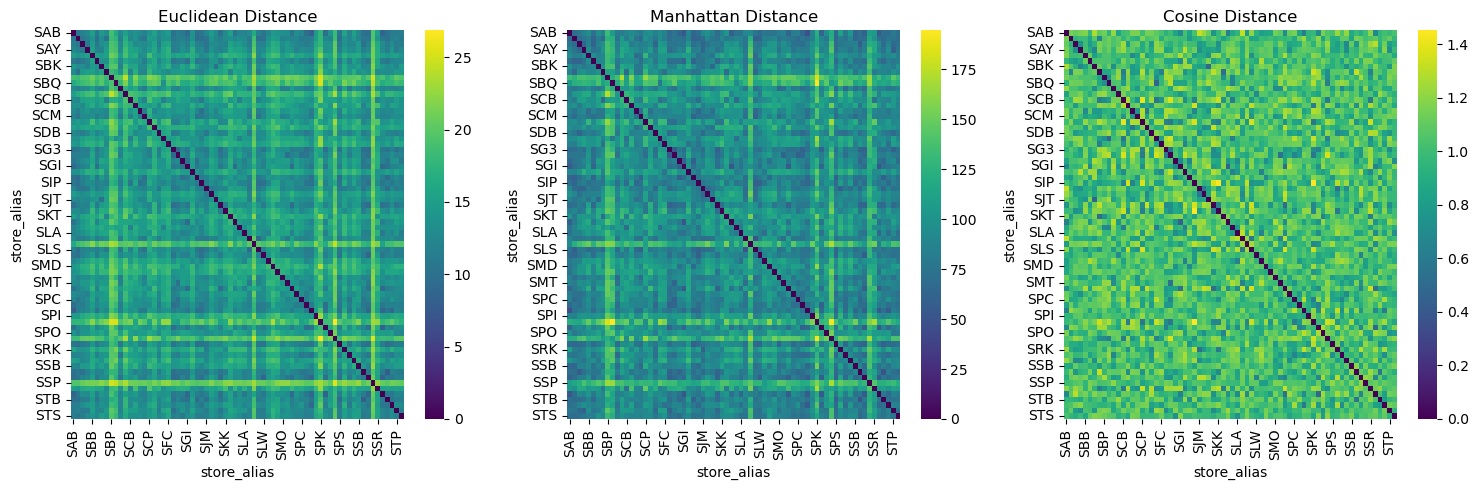

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(distances_euclidean_df, cmap='viridis')
plt.title('Euclidean Distance')

plt.subplot(1, 3, 2)
sns.heatmap(distances_manhattan_df, cmap='viridis')
plt.title('Manhattan Distance')

plt.subplot(1, 3, 3)
sns.heatmap(distances_cosine_df, cmap='viridis')
plt.title('Cosine Distance')

plt.tight_layout()
plt.show()



In [39]:
summary_stats = pd.DataFrame({
    'Metric': ['Euclidean', 'Manhattan', 'Cosine'],
    'Mean': [distances_euclidean.mean(), distances_manhattan.mean(), distances_cosine.mean()],
    'Median': [np.median(distances_euclidean), np.median(distances_manhattan), np.median(distances_cosine)],
    'Std Dev': [distances_euclidean.std(), distances_manhattan.std(), distances_cosine.std()]
})

print(summary_stats)

      Metric       Mean     Median    Std Dev
0  Euclidean  14.832478  14.716854   3.463756
1  Manhattan  96.606426  95.252268  24.503129
2     Cosine   0.998197   1.022366   0.194874


Note: 
Cosine --> what does it mean when magnitude of vectors varies significantly?

= overall scale / intensity of values are different (i.e. even if proportions of brands are similar, some stores might have higher overall sales volumes than others)

= it's direction of vectores, not magnitude --> if brand proportion is similar, then their vectors will point in the same direction (cosine distance is low == high similarity)

Values Close to 0: The stores have very similar brand distributions. (vectors have identical direction)
Values Close to 1: The stores have dissimilar brand distributions (almost no similarity).
Values Greater than 1: The stores are more than orthogonal, which means they have very different brand distributions.

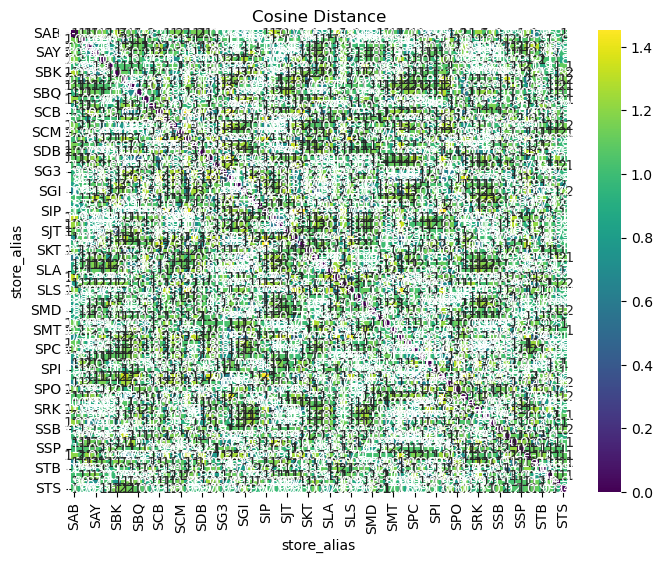

In [40]:
distances_cosine = pairwise_distances(pivot_df, metric='cosine')

# Convert distance arrays to DataFrames for better readability
distances_cosine_df = pd.DataFrame(distances_cosine, index=pivot_df.index, columns=pivot_df.index)

# Plot heatmap for cosine distance
plt.figure(figsize=(8, 6))
sns.heatmap(distances_cosine_df, cmap='viridis', annot=True)
plt.title('Cosine Distance')
plt.show()

Note to self: might need to print the results of these distance calculations store-by-store

But let's continue first to the other methods.

IDENTIFYING OUTLIERS

- using Isolation Forest

In [52]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1) # ambil base standard 10% of data is outliers
outlier_predictions_iso = iso_forest.fit_predict(pivot_df)

outliers_iso = pivot_df[outlier_predictions_iso == -1]
print(outliers_iso)

               acwell       ahc    anessa     ariul   avoskin   azarine  \
store_alias                                                               
SBP          0.249034 -0.120386 -0.449455 -0.824991 -0.523714  1.689968   
SBQ         -0.939755 -0.120386 -0.449455 -0.145610 -1.103169  1.449958   
SCC          0.912695 -0.120386  2.596972  0.084923 -0.062242 -2.210343   
SLP          0.829143 -0.120386 -0.449455  1.723616 -0.936744 -1.962782   
SPK          5.253142 -0.120386  2.770714  0.975767  0.330852 -0.736115   
SPR         -1.381558 -0.120386 -0.449455 -0.885980 -1.773518  1.078170   
SSP          0.627563 -0.120386 -0.449455  4.559162 -0.668808 -0.312287   

             banana boat  barenbliss  beauty of joseon  beauty secrets  ...  \
store_alias                                                             ...   
SBP            -0.120386    2.974425          0.600921       -0.120386  ...   
SBQ            -0.120386    0.043014          0.862174       -0.120386  ...   
SCC     

In [64]:
iso_scores = iso_forest.decision_function(pivot_df)
iso_outliers = iso_forest.predict(pivot_df)

iso_results = pd.DataFrame({
    'Store': pivot_df.index,
    'Anomaly Score': iso_scores,
    'Outlier': iso_outliers
})

iso_results_sorted = iso_results.sort_values(by='Anomaly Score')
iso_results_sorted.head()

,Store,Anomaly Score,Outlier
38,SLP,-0.041414,-1
55,SPR,-0.030883,-1
63,SSP,-0.023895,-1
52,SPK,-0.023113,-1
9,SBQ,-0.022136,-1


In [66]:
filtered_iso_results = iso_results_sorted[iso_results_sorted['Outlier'] == -1]
filtered_iso_results.set_index('Store', inplace=True)
outliers_iso.index.name = 'Store'

# Check equality
is_equal = filtered_iso_results.equals(outliers_iso)
print("Are the outlier DataFrames equal? ", is_equal)

Are the outlier DataFrames equal?  False


In [67]:
with pd.ExcelWriter('iso_outliers_score.xlsx') as writer:
    iso_results_sorted.to_excel(writer, sheet_name='ISO results')

- Local Outlier Factor (LOF)

In [53]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_predictions_lof = lof.fit_predict(pivot_df)

outliers_lof = pivot_df[outlier_predictions_lof == -1]
print(outliers_lof)

               acwell       ahc    anessa     ariul   avoskin   azarine  \
store_alias                                                               
SBP          0.249034 -0.120386 -0.449455 -0.824991 -0.523714  1.689968   
SBQ         -0.939755 -0.120386 -0.449455 -0.145610 -1.103169  1.449958   
SBW         -0.090891 -0.120386 -0.449455 -0.375007 -0.831520 -1.104819   
SLP          0.829143 -0.120386 -0.449455  1.723616 -0.936744 -1.962782   
SPK          5.253142 -0.120386  2.770714  0.975767  0.330852 -0.736115   
SPR         -1.381558 -0.120386 -0.449455 -0.885980 -1.773518  1.078170   
SSP          0.627563 -0.120386 -0.449455  4.559162 -0.668808 -0.312287   

             banana boat  barenbliss  beauty of joseon  beauty secrets  ...  \
store_alias                                                             ...   
SBP            -0.120386    2.974425          0.600921       -0.120386  ...   
SBQ            -0.120386    0.043014          0.862174       -0.120386  ...   
SBW     

In [68]:
lof_scores = lof.negative_outlier_factor_

lof_results = pd.DataFrame({
    'Store': pivot_df.index,
    'LOF Score': lof_scores,
    'Outlier': outlier_predictions_lof
})

lof_results_sorted = lof_results.sort_values(by='LOF Score')
print(lof_results_sorted)



   Store  LOF Score  Outlier
63   SSP  -1.610077       -1
8    SBP  -1.457360       -1
38   SLP  -1.435277       -1
55   SPR  -1.416913       -1
9    SBQ  -1.372054       -1
..   ...        ...      ...
26   SGP  -0.987925        1
56   SPS  -0.986981        1
1    SAG  -0.986580        1
40   SLW  -0.984701        1
5    SBE  -0.983168        1

[70 rows x 3 columns]


In [69]:
with pd.ExcelWriter('lof_results.xlsx') as writer:
    lof_results_sorted.to_excel(writer, sheet_name='LOF Results')
    outliers_lof.to_excel(writer, sheet_name='LOF Outliers')

print("LOF results have been saved to lof_results.xlsx")

LOF results have been saved to lof_results.xlsx


Visualize the Outliers First (t-SNE)

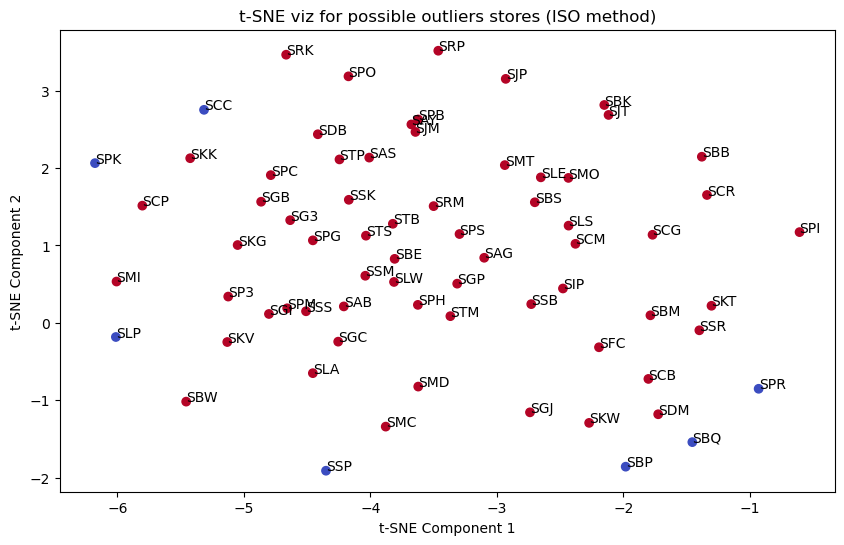

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(pivot_df)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=outlier_predictions_iso, cmap='coolwarm', marker='o')

for i, txt in enumerate(pivot_df.index):
    plt.annotate(txt, (data_tsne[i, 0], data_tsne[i, 1]))


plt.title ('t-SNE viz for possible outliers stores (ISO method)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# plt.colorbar(scatter, label='Outlier Score')
plt.show()

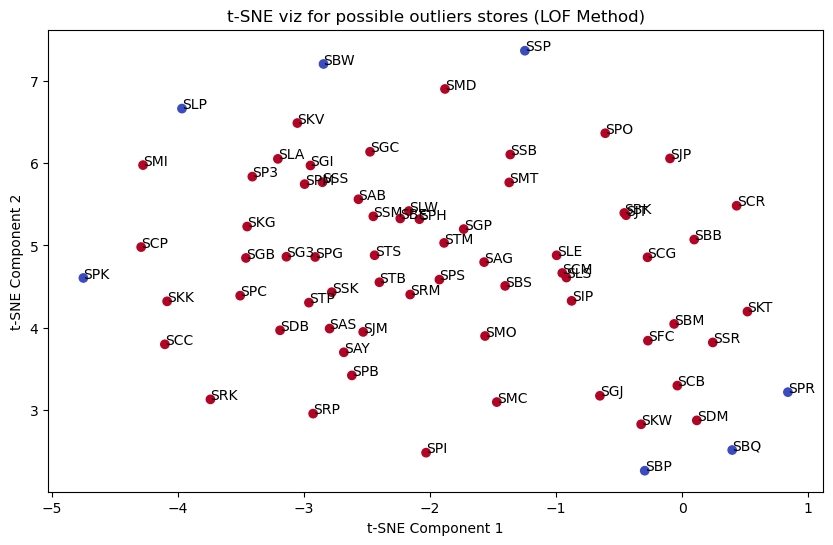

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(pivot_df)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=outlier_predictions_lof, cmap='coolwarm', marker='o')

for i, txt in enumerate(pivot_df.index):
    plt.annotate(txt, (data_tsne[i, 0], data_tsne[i, 1]))


plt.title ('t-SNE viz for possible outliers stores (LOF Method)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# plt.colorbar(scatter, label='Outlier Score')
plt.show()

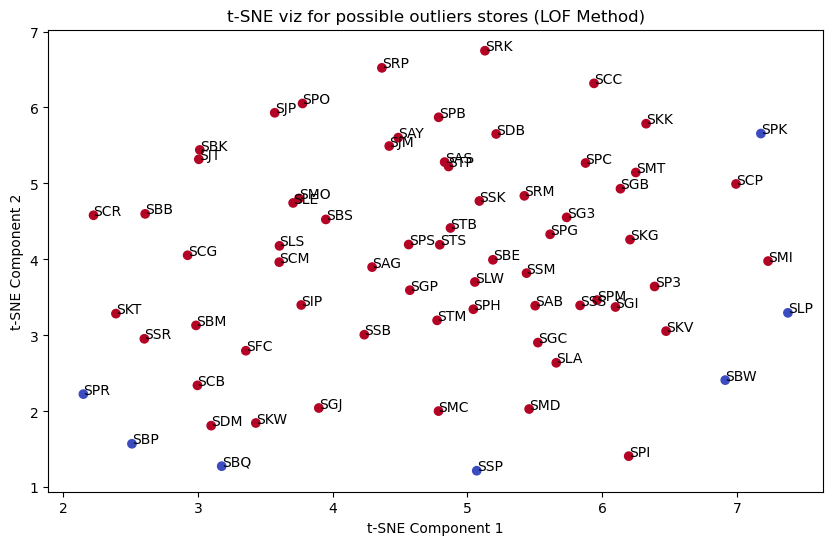

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(pivot_df)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=outlier_predictions, cmap='coolwarm', marker='o')

for i, txt in enumerate(pivot_df.index):
    plt.annotate(txt, (data_tsne[i, 0], data_tsne[i, 1]))


plt.title ('t-SNE viz for possible outliers stores (LOF Method)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
# plt.colorbar(scatter, label='Outlier Score')
plt.show()

In [61]:
# Saving pairwise distance computation results to csv
with pd.ExcelWriter('distances_and_stats.xlsx') as writer:
    distances_euclidean_df.to_excel(writer, sheet_name='Euclidean Distances')
    distances_manhattan_df.to_excel(writer, sheet_name='Manhattan Distances')
    distances_cosine_df.to_excel(writer, sheet_name='Cosine Distances')
    summary_stats.to_excel(writer, sheet_name='Summary Statistics')

print("Files have been saved to distances_and_stats.xlsx with separate sheets for each metric.")


Files have been saved to distances_and_stats.xlsx with separate sheets for each metric.


In [62]:
# Saving ISO and LOF outliers to csv
with pd.ExcelWriter('iso_and_lof_outliers.xlsx') as writer:
    outliers_iso.to_excel(writer, sheet_name='ISO calcs')
    outliers_lof.to_excel(writer, sheet_name='LOF calcs')

print("Files have been saved to iso_and_lof_outliers.xlsx with separate sheets for each metric.")
    



Files have been saved to iso_and_lof_outliers.xlsx with separate sheets for each metric.


Note:

As of Wed, 12 June 2024 review with Kak Mandee, the reasoning behind why these stores are scored as outliers are not impactful/relevant enough. We've decided to try running the clustering model to all of the stores without excepting the outliers - but still seperate stores which are less than 1 year per May 2024.

Let us proceed with running the model below.

# Clustering YTD 2024 - ALL Stores

In [8]:
df.head()

,store_alias,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
0,SAB,0.000510,0.0,0.0,0.010700,0.010766,0.025020,0.0,0.024236,0.006206,...,0.004351,0.0,0.000131,0.013575,0.0,0.012464,0.0,0.000000,0.006402,0.007918
1,SAG,0.000350,0.0,0.0,0.008516,0.012361,0.032633,0.0,0.033841,0.000000,...,0.004862,0.0,0.000508,0.022465,0.0,0.013949,0.0,0.003877,0.008134,0.016269
2,SAS,0.000781,0.0,0.0,0.015225,0.013521,0.032677,0.0,0.031327,0.003883,...,0.005233,0.0,0.000308,0.000000,0.0,0.024886,0.0,0.000000,0.006819,0.012431
3,SAY,0.000516,0.0,0.0,0.011128,0.017000,0.034535,0.0,0.035131,0.000000,...,0.003432,0.0,0.000595,0.003452,0.0,0.020451,0.0,0.000000,0.006784,0.020987
4,SBB,0.000211,0.0,0.0,0.018252,0.010605,0.031815,0.0,0.032026,0.000000,...,0.006295,0.0,0.000718,0.007478,0.0,0.020492,0.0,0.000000,0.006971,0.019520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, SAB to STS
Columns: 116 entries, acwell to you beauty
dtypes: float64(116)
memory usage: 64.0+ KB


In [23]:
df.head()

,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,beauty secrets,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
store_alias,,,,,,,,,,,,,,,,,,,,,
SAB,0.000510,0.0,0.0,0.010700,0.010766,0.025020,0.0,0.024236,0.006206,0.0,...,0.004351,0.0,0.000131,0.013575,0.0,0.012464,0.0,0.000000,0.006402,0.007918
SAG,0.000350,0.0,0.0,0.008516,0.012361,0.032633,0.0,0.033841,0.000000,0.0,...,0.004862,0.0,0.000508,0.022465,0.0,0.013949,0.0,0.003877,0.008134,0.016269
SAS,0.000781,0.0,0.0,0.015225,0.013521,0.032677,0.0,0.031327,0.003883,0.0,...,0.005233,0.0,0.000308,0.000000,0.0,0.024886,0.0,0.000000,0.006819,0.012431
SAY,0.000516,0.0,0.0,0.011128,0.017000,0.034535,0.0,0.035131,0.000000,0.0,...,0.003432,0.0,0.000595,0.003452,0.0,0.020451,0.0,0.000000,0.006784,0.020987
SBB,0.000211,0.0,0.0,0.018252,0.010605,0.031815,0.0,0.032026,0.000000,0.0,...,0.006295,0.0,0.000718,0.007478,0.0,0.020492,0.0,0.000000,0.006971,0.019520


In [24]:
# print(type(pivot_df))
pivot_df = df

pivot_df.head()

,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,beauty secrets,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
store_alias,,,,,,,,,,,,,,,,,,,,,
SAB,0.000510,0.0,0.0,0.010700,0.010766,0.025020,0.0,0.024236,0.006206,0.0,...,0.004351,0.0,0.000131,0.013575,0.0,0.012464,0.0,0.000000,0.006402,0.007918
SAG,0.000350,0.0,0.0,0.008516,0.012361,0.032633,0.0,0.033841,0.000000,0.0,...,0.004862,0.0,0.000508,0.022465,0.0,0.013949,0.0,0.003877,0.008134,0.016269
SAS,0.000781,0.0,0.0,0.015225,0.013521,0.032677,0.0,0.031327,0.003883,0.0,...,0.005233,0.0,0.000308,0.000000,0.0,0.024886,0.0,0.000000,0.006819,0.012431
SAY,0.000516,0.0,0.0,0.011128,0.017000,0.034535,0.0,0.035131,0.000000,0.0,...,0.003432,0.0,0.000595,0.003452,0.0,0.020451,0.0,0.000000,0.006784,0.020987
SBB,0.000211,0.0,0.0,0.018252,0.010605,0.031815,0.0,0.032026,0.000000,0.0,...,0.006295,0.0,0.000718,0.007478,0.0,0.020492,0.0,0.000000,0.006971,0.019520


C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


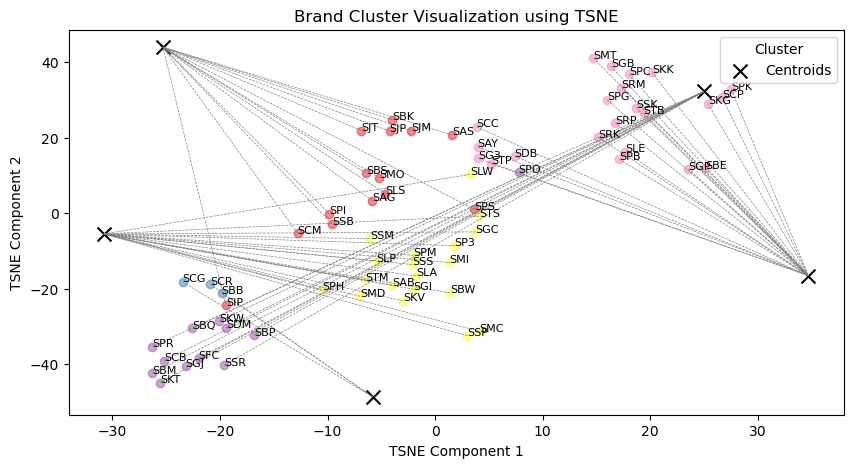

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

float_columns = pivot_df.select_dtypes(include=['float64']).columns
X = pivot_df[float_columns].values
perplexity = 4

n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 5))

for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], pivot_df.index[i], fontsize=8)  # Display store_alias for each data point
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], color=plt.cm.Set1(cluster_labels[i] / n_clusters), alpha=0.5)
    

centroids_tsne = tsne.fit_transform(centroids)
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color='black', marker='x', s=100, label='Centroids')

# Connect data points to centroids with lines
for i in range(len(X_tsne)):
    centroid_index = cluster_labels[i]
    plt.plot([X_tsne[i, 0], centroids_tsne[centroid_index, 0]], [X_tsne[i, 1], centroids_tsne[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)


plt.title('Brand Cluster Visualization using TSNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()

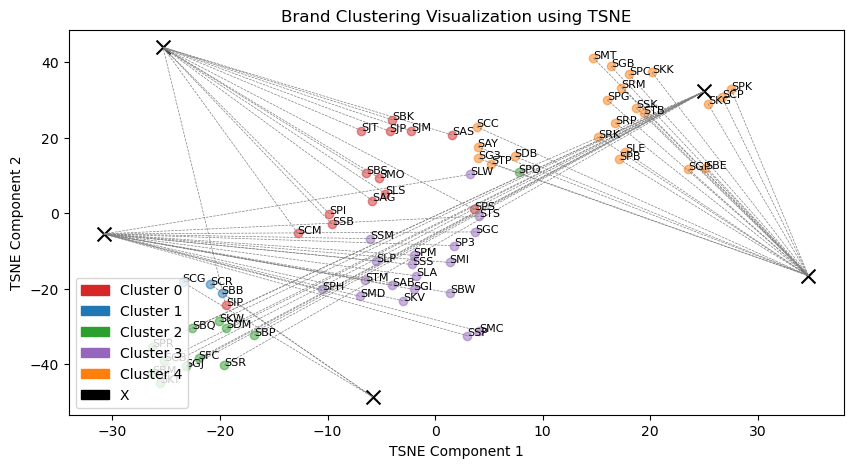

In [30]:
import seaborn as sns

custom_palette = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(10, 5))

# Plot each data point with its label and index (store_alias)
for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], pivot_df.index[i], fontsize=8)  # Display store_alias for each data point

# Define the custom palette
custom_palette = ['#d62728', '#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']

# Use seaborn palette for cluster colors
sns_palette = sns.color_palette(custom_palette, n_colors=n_clusters)

# Plot each data point with its cluster color
for cluster in range(n_clusters):
    cluster_indices = cluster_labels == cluster
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], color=sns_palette[cluster], alpha=0.5, label=f'Cluster {cluster}')

# Plot centroids
centroids_tsne = tsne.fit_transform(centroids)
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color='black', marker='x', s=100, label='Centroids')

# Connect data points to centroids with lines
for i in range(len(X_tsne)):
    centroid_index = cluster_labels[i]
    plt.plot([X_tsne[i, 0], centroids_tsne[centroid_index, 0]], [X_tsne[i, 1], centroids_tsne[centroid_index, 1]],
             color='gray', linestyle='--', linewidth=0.5)

plt.title('Brand Clustering Visualization using TSNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

# Generate custom legend for cluster labels
legend_labels = [f'Cluster {cluster}' for cluster in range(n_clusters)]
legend_labels.append('Centroids')
plt.legend(legend_labels, loc='upper right')

# Set custom colors for legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(sns_palette, legend_labels[:-1])]
legend_handles.append(mpatches.Patch(color='black', label='X'))
plt.legend(handles=legend_handles, loc='lower left')

plt.show()

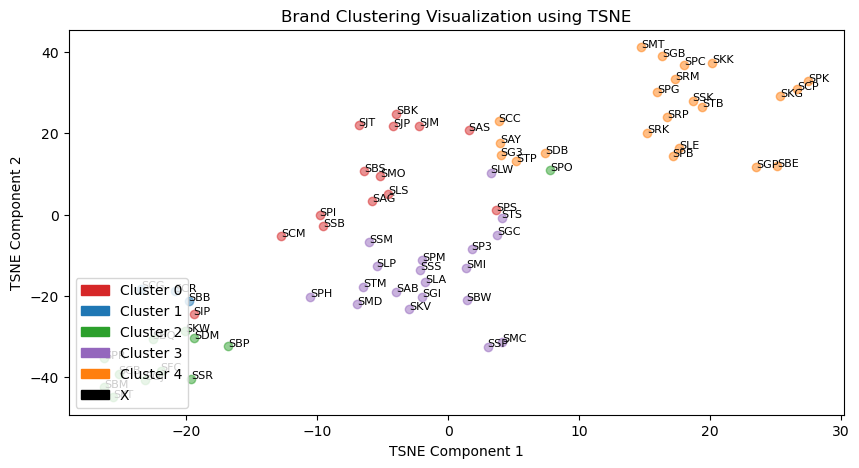

In [31]:
import seaborn as sns

custom_palette = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(10, 5))

# Plot each data point with its label and index (store_alias)
for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], pivot_df.index[i], fontsize=8)  # Display store_alias for each data point

# Define the custom palette
custom_palette = ['#d62728', '#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']

# Use seaborn palette for cluster colors
sns_palette = sns.color_palette(custom_palette, n_colors=n_clusters)

# Plot each data point with its cluster color
for cluster in range(n_clusters):
    cluster_indices = cluster_labels == cluster
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], color=sns_palette[cluster], alpha=0.5, label=f'Cluster {cluster}')

# Plot centroids
# centroids_tsne = tsne.fit_transform(centroids)
# plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color='black', marker='x', s=100, label='Centroids')

# Connect data points to centroids with lines
# for i in range(len(X_tsne)):
#     centroid_index = cluster_labels[i]
#     plt.plot([X_tsne[i, 0], centroids_tsne[centroid_index, 0]], [X_tsne[i, 1], centroids_tsne[centroid_index, 1]],
#              color='gray', linestyle='--', linewidth=0.5)

plt.title('Brand Clustering Visualization using TSNE')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

# Generate custom legend for cluster labels
legend_labels = [f'Cluster {cluster}' for cluster in range(n_clusters)]
legend_labels.append('Centroids')
plt.legend(legend_labels, loc='upper right')

# Set custom colors for legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(sns_palette, legend_labels[:-1])]
legend_handles.append(mpatches.Patch(color='black', label='X'))
plt.legend(handles=legend_handles, loc='lower left')

plt.show()

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: perplexity must be less than n_samples

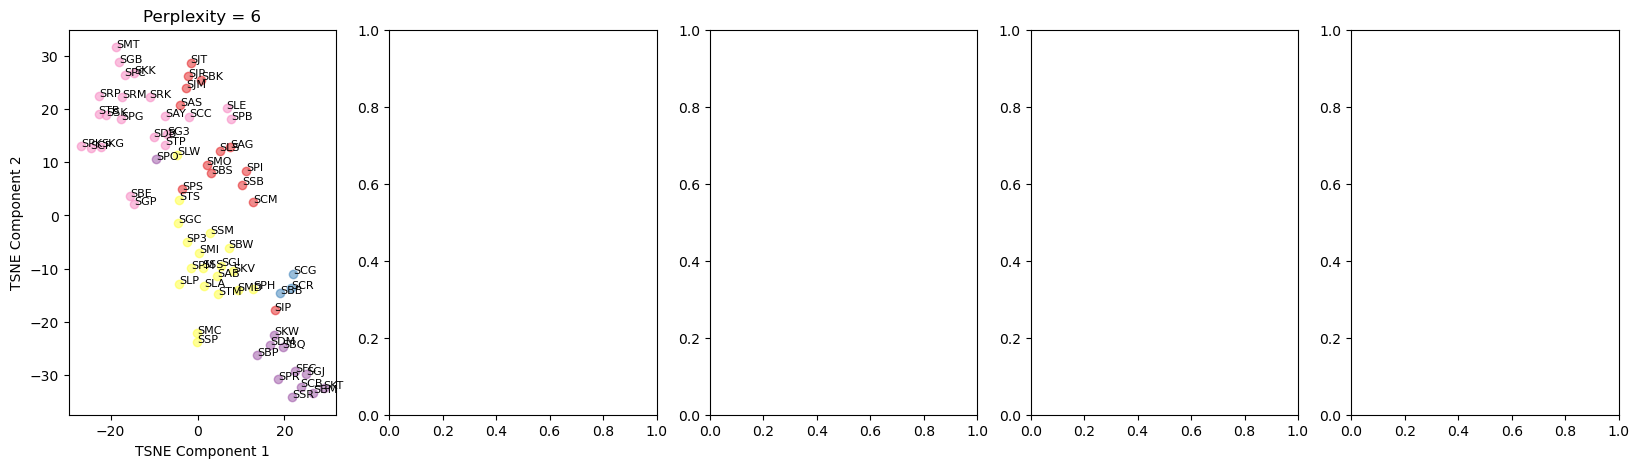

In [35]:
## Experimenting with TSNE's perplexity values

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

float_columns = pivot_df.select_dtypes(include=['float64']).columns
X = pivot_df[float_columns].values

n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# List of perplexity values to try
perplexity_values = [6, 7, 8, 9, 10]

fig, axes = plt.subplots(1, len(perplexity_values), figsize=(20, 5))

for idx, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    axes[idx].set_title(f'Perplexity = {perplexity}')
    axes[idx].set_xlabel('TSNE Component 1')
    axes[idx].set_ylabel('TSNE Component 2')

    for i in range(len(X_tsne)):
        axes[idx].text(X_tsne[i, 0], X_tsne[i, 1], pivot_df.index[i], fontsize=8)
        axes[idx].scatter(X_tsne[i, 0], X_tsne[i, 1], color=plt.cm.Set1(cluster_labels[i] / n_clusters), alpha=0.5)

    centroids_tsne = tsne.fit_transform(centroids)
    axes[idx].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color='black', marker='x', s=100, label='Centroids')

    for i in range(len(X_tsne)):
        centroid_index = cluster_labels[i]
        axes[idx].plot([X_tsne[i, 0], centroids_tsne[centroid_index, 0]], [X_tsne[i, 1], centroids_tsne[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)

plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


## Comparison between TSNE and PCA Visualizations

C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tiara.santoso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


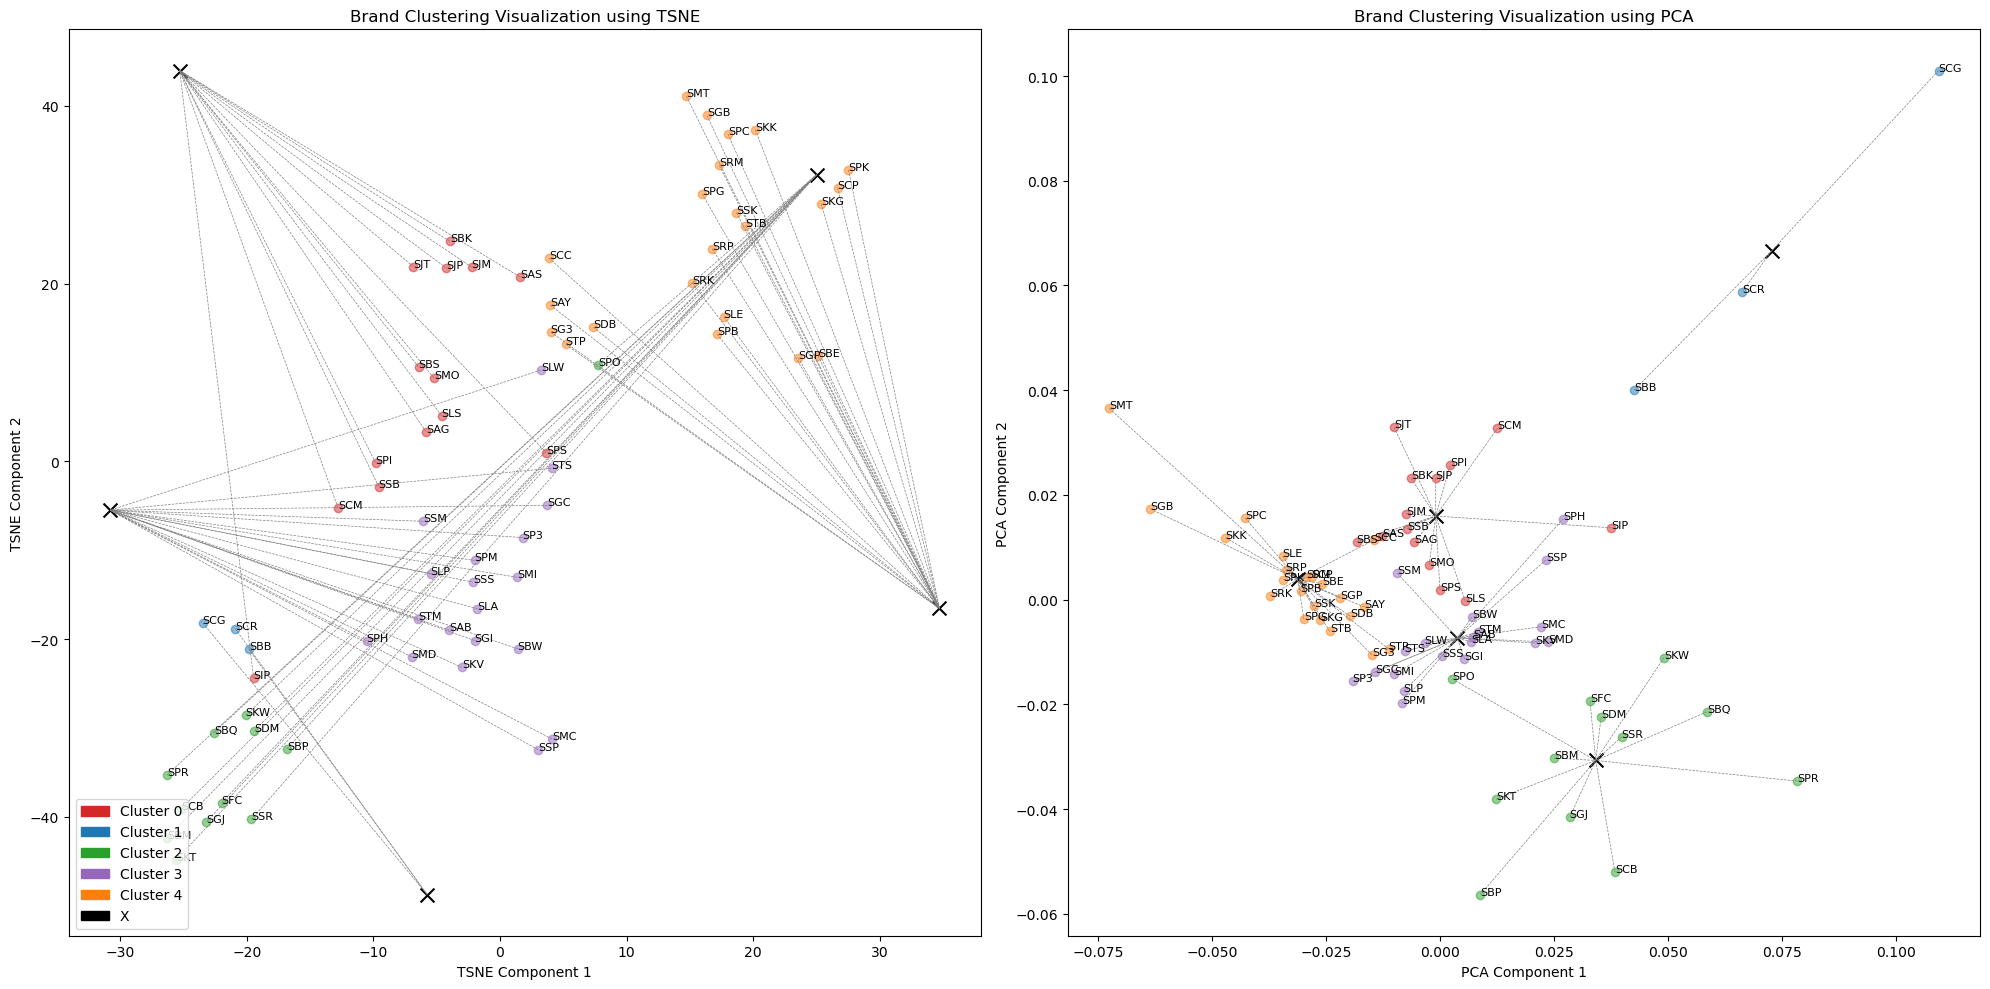

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.patches as mpatches

# Extract float columns for clustering
float_columns = pivot_df.select_dtypes(include=['float64']).columns
X = pivot_df[float_columns].values

# KMeans clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# t-SNE transformation
perplexity = 4  # Adjust this value as needed
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X)
centroids_tsne = tsne.fit_transform(centroids)

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Custom palette
custom_palette = ['#d62728', '#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']
sns_palette = sns.color_palette(custom_palette, n_colors=n_clusters)

# Plot t-SNE and PCA side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# t-SNE plot
axes[0].set_title('Brand Clustering Visualization using TSNE')
for i in range(len(X_tsne)):
    axes[0].text(X_tsne[i, 0], X_tsne[i, 1], pivot_df.index[i], fontsize=8)
for cluster in range(n_clusters):
    cluster_indices = cluster_labels == cluster
    axes[0].scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], color=sns_palette[cluster], alpha=0.5, label=f'Cluster {cluster}')
axes[0].scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color='black', marker='x', s=100, label='Centroids')
for i in range(len(X_tsne)):
    centroid_index = cluster_labels[i]
    axes[0].plot([X_tsne[i, 0], centroids_tsne[centroid_index, 0]], [X_tsne[i, 1], centroids_tsne[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)
axes[0].set_xlabel('TSNE Component 1')
axes[0].set_ylabel('TSNE Component 2')

# PCA plot
axes[1].set_title('Brand Clustering Visualization using PCA')
for i in range(len(X_pca)):
    axes[1].text(X_pca[i, 0], X_pca[i, 1], pivot_df.index[i], fontsize=8)
for cluster in range(n_clusters):
    cluster_indices = cluster_labels == cluster
    axes[1].scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], color=sns_palette[cluster], alpha=0.5, label=f'Cluster {cluster}')
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='x', s=100, label='Centroids')
for i in range(len(X_pca)):
    centroid_index = cluster_labels[i]
    axes[1].plot([X_pca[i, 0], centroids_pca[centroid_index, 0]], [X_pca[i, 1], centroids_pca[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

# Custom legend
legend_labels = [f'Cluster {cluster}' for cluster in range(n_clusters)]
legend_labels.append('Centroids')
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(sns_palette, legend_labels[:-1])]
legend_handles.append(mpatches.Patch(color='black', label='X'))

# Add legend to the first plot
axes[0].legend(handles=legend_handles, loc='lower left')

plt.tight_layout()
plt.show()

## PCA Loadings or Scoring (just in case) ##

In [37]:
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=float_columns)

# Sort attributes by influence on PC1 and PC2
sorted_pc1 = loading_df['PC1'].abs().sort_values(ascending=False)
sorted_pc2 = loading_df['PC2'].abs().sort_values(ascending=False)

print("Attributes most influencing the x-axis (PC1):")
print(sorted_pc1)

print("\nAttributes most influencing the y-axis (PC2):")
print(sorted_pc2)

Attributes most influencing the x-axis (PC1):
breylee           0.637095
skintific         0.552938
the originote     0.255778
cosrx             0.254540
luxcrime          0.140167
                    ...   
momopuri          0.000023
mama butter       0.000020
note cosmetics    0.000003
some by mi        0.000003
ahc               0.000001
Name: PC1, Length: 116, dtype: float64

Attributes most influencing the y-axis (PC2):
breylee           0.674076
skintific         0.453425
the originote     0.287862
luxcrime          0.256162
glad2glow         0.143073
                    ...   
ahc               0.000022
some by mi        0.000015
momopuri          0.000013
secret key        0.000013
note cosmetics    0.000008
Name: PC2, Length: 116, dtype: float64


In [38]:
with pd.ExcelWriter('20240614 - YTD24-newtemplate-allstores-PCA_loadings.xlsx') as writer:
    sorted_pc1.to_excel(writer, sheet_name='PC1_Sorted')
    sorted_pc2.to_excel(writer, sheet_name='PC2_Sorted')

print("Sorted PCA loadings have been saved to 20240614 - YTD24-newtemplate-allstores-PCA_loadings.xlsx")

Sorted PCA loadings have been saved to 20240614 - YTD24-newtemplate-allstores-PCA_loadings.xlsx


In [39]:
cluster_df = pivot_df.copy()
cluster_df['Cluster'] = cluster_labels

print(cluster_df['Cluster'])

store_alias
SAB    3
SAG    0
SAS    0
SAY    4
SBB    1
      ..
SSS    3
STB    4
STM    3
STP    4
STS    3
Name: Cluster, Length: 70, dtype: int32


In [40]:
cluster_stats = cluster_df.groupby('Cluster').mean()
print(cluster_stats)

           acwell       ahc    anessa     ariul   avoskin   azarine  \
Cluster                                                               
0        0.000434  0.000002  0.000506  0.012477  0.012936  0.037614   
1        0.000364  0.000000  0.000000  0.024016  0.011317  0.034127   
2        0.000421  0.000000  0.000000  0.008825  0.010276  0.033343   
3        0.000559  0.000000  0.000000  0.014672  0.010637  0.024942   
4        0.000761  0.000000  0.001882  0.009581  0.014426  0.030507   

         banana boat  barenbliss  beauty of joseon  beauty secrets  ...  \
Cluster                                                             ...   
0           0.000000    0.034624          0.000740        0.000000  ...   
1           0.000000    0.031769          0.000951        0.000000  ...   
2           0.000000    0.040255          0.002099        0.000235  ...   
3           0.000298    0.024552          0.003333        0.000000  ...   
4           0.000000    0.032870          0.002002  

In [28]:
with pd.ExcelWriter('20240613-brand_cluster_results_and_stats.xlsx') as writer:
    cluster_df.to_excel(writer, sheet_name='Cluster Assignments')
    cluster_stats.to_excel(writer, sheet_name='Cluster Statistics')

# Clustering YTD 2024 - only stores before 2024

In [43]:
file_path = r'C:\Users\tiara.santoso\Downloads\Data Exports\20240604 - Data Cluster Original for Brands.xlsx'

sheet_name = 'New-Without_2024_Stores'
df_no_2024 = pd.read_excel(file_path, sheet_name=sheet_name)
df_no_2024.head(10)

,store_alias,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
0,SKK,0.000738,0.0,0.0,0.007433,0.017429,0.026928,0.0,0.029491,0.006065,...,0.004146,0.000000,0.000242,0.000000,0.0,0.009285,0.0,0.0,0.010224,0.008198
1,SLP,0.000905,0.0,0.0,0.026012,0.009833,0.017781,0.0,0.017181,0.007053,...,0.004906,0.000000,0.000469,0.013387,0.0,0.012417,0.0,0.0,0.000000,0.006497
2,STP,0.000584,0.0,0.0,0.008623,0.014537,0.036349,0.0,0.031813,0.000000,...,0.004461,0.000000,0.001123,0.019148,0.0,0.020151,0.0,0.0,0.009282,0.015270
3,SKV,0.000689,0.0,0.0,0.008873,0.010665,0.019606,0.0,0.023448,0.005324,...,0.006013,0.000000,0.000207,0.010630,0.0,0.014024,0.0,0.0,0.005461,0.006271
4,SPH,0.000598,0.0,0.0,0.011092,0.010205,0.030305,0.0,0.017503,0.000000,...,0.003793,0.004285,0.000128,0.011872,0.0,0.013988,0.0,0.0,0.004702,0.007683
5,SBE,0.000738,0.0,0.0,0.005303,0.012053,0.035282,0.0,0.029478,0.000000,...,0.003994,0.004690,0.000278,0.000000,0.0,0.016131,0.0,0.0,0.007140,0.011608
6,SKG,0.000882,0.0,0.0,0.008079,0.011575,0.027954,0.0,0.033245,0.000000,...,0.003575,0.000000,0.000236,0.000000,0.0,0.015371,0.0,0.0,0.008394,0.010410
7,SCM,0.000781,0.0,0.0,0.013304,0.014287,0.042408,0.0,0.023963,0.000000,...,0.003301,0.000000,0.000428,0.004258,0.0,0.019805,0.0,0.0,0.010054,0.017412
8,SPM,0.000624,0.0,0.0,0.007878,0.010472,0.025000,0.0,0.023547,0.000000,...,0.003793,0.000000,0.000146,0.012919,0.0,0.019130,0.0,0.0,0.005821,0.011398
9,SAS,0.000781,0.0,0.0,0.015225,0.013521,0.032677,0.0,0.031327,0.003883,...,0.005233,0.000000,0.000308,0.000000,0.0,0.024886,0.0,0.0,0.006819,0.012431


In [44]:
df_no_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 117 entries, store_alias to you beauty
dtypes: float64(114), int64(2), object(1)
memory usage: 55.0+ KB


# Clustering YTD 2024 - only stores >= 1 year

## END CHECKPOINT ##

In [34]:
print(pivot_df.dtypes)

acwell        float64
ahc           float64
anessa        float64
ariul         float64
avoskin       float64
               ...   
vaseline      float64
verites       float64
wardah        float64
whitelab      float64
you beauty    float64
Length: 116, dtype: object


In [ ]:
data.set_index(['store_alias', 'cluster'], inplace=True)

data = data.pivot_table(index=['store_alias', 'cluster'], columns='brand', values='brand_distribution_in_store', fill_value=0)
# pivot_df.set_index('store_alias', inplace=True)
data.reset_index(inplace=True)



print(data)

brand store_alias  cluster    a'pieu    anessa     ariul   avoskin   azarine  \
0             SAB        0  0.000000  0.000000  0.048174  0.015663  0.018449   
1             SAG        4  0.000000  0.000000  0.028838  0.015706  0.035470   
2             SAS        4  0.004771  0.000000  0.028947  0.019065  0.027133   
3             SAY        4  0.004315  0.000000  0.042979  0.020744  0.031866   
4             SBB        2  0.000000  0.000000  0.040649  0.000000  0.000000   
5             SBE        1  0.000000  0.000000  0.023204  0.021505  0.027363   
6             SBK        2  0.000000  0.000000  0.041125  0.019097  0.024640   
7             SBS        1  0.000000  0.000000  0.000000  0.025772  0.040097   
8             SCC        0  0.000000  0.004584  0.040128  0.021946  0.012979   
9             SCG        2  0.006045  0.000000  0.025374  0.013727  0.035893   
10            SCM        2  0.005824  0.000000  0.032741  0.020468  0.031342   
11            SCP        0  0.003748  0.

In [ ]:
data.head(55)
# data_train = data.set_index('store_alias', inplace=True)

brand,store_alias,cluster,a'pieu,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,benefit cosmetics,...,studio tropik,sukin,syca,tammia,teddy clubs,the originote,vaseline,wardah,whitelab,you beauty
0,SAB,0,0.000000,0.000000,0.048174,0.015663,0.018449,0.030662,0.000000,0.000000,...,0.005990,0.009320,0.000000,0.004878,0.000000,0.000000,0.012090,0.000000,0.004816,0.011508
1,SAG,4,0.000000,0.000000,0.028838,0.015706,0.035470,0.039648,0.000000,0.000000,...,0.008378,0.006218,0.000000,0.000000,0.000000,0.007520,0.019370,0.005602,0.006753,0.019602
2,SAS,4,0.004771,0.000000,0.028947,0.019065,0.027133,0.041140,0.000000,0.000000,...,0.006834,0.010110,0.000000,0.000000,0.000000,0.000000,0.000000,0.004667,0.004543,0.012414
3,SAY,4,0.004315,0.000000,0.042979,0.020744,0.031866,0.038379,0.000000,0.000000,...,0.005938,0.009509,0.000000,0.005250,0.000000,0.000000,0.019907,0.004437,0.005535,0.015737
4,SBB,2,0.000000,0.000000,0.040649,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025148,0.003518,0.005822,0.000000
5,SBE,1,0.000000,0.000000,0.023204,0.021505,0.027363,0.035992,0.000000,0.000000,...,0.006708,0.012675,0.000000,0.006218,0.000000,0.000000,0.018709,0.000000,0.004963,0.012587
6,SBK,2,0.000000,0.000000,0.041125,0.019097,0.024640,0.054823,0.000000,0.000000,...,0.004434,0.007613,0.000000,0.006175,0.000000,0.000000,0.023210,0.003058,0.005710,0.013630
7,SBS,1,0.000000,0.000000,0.000000,0.025772,0.040097,0.000000,0.000000,0.000000,...,0.005047,0.006547,0.000000,0.005738,0.000000,0.004356,0.026210,0.004951,0.007196,0.021732
8,SCC,0,0.000000,0.004584,0.040128,0.021946,0.012979,0.027674,0.000000,0.000000,...,0.005682,0.010127,0.000000,0.005581,0.000000,0.000000,0.012879,0.000000,0.006138,0.009902
9,SCG,2,0.006045,0.000000,0.025374,0.013727,0.035893,0.046458,0.000000,0.000000,...,0.008560,0.004992,0.000000,0.000000,0.000000,0.000000,0.019828,0.004132,0.006960,0.019254


In [ ]:
df = data
df.head()

brand,store_alias,cluster,a'pieu,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,benefit cosmetics,...,studio tropik,sukin,syca,tammia,teddy clubs,the originote,vaseline,wardah,whitelab,you beauty
0,SAB,0,0.000000,0.0,0.048174,0.015663,0.018449,0.030662,0.0,0.0,...,0.005990,0.009320,0.0,0.004878,0.0,0.00000,0.012090,0.000000,0.004816,0.011508
1,SAG,4,0.000000,0.0,0.028838,0.015706,0.035470,0.039648,0.0,0.0,...,0.008378,0.006218,0.0,0.000000,0.0,0.00752,0.019370,0.005602,0.006753,0.019602
2,SAS,4,0.004771,0.0,0.028947,0.019065,0.027133,0.041140,0.0,0.0,...,0.006834,0.010110,0.0,0.000000,0.0,0.00000,0.000000,0.004667,0.004543,0.012414
3,SAY,4,0.004315,0.0,0.042979,0.020744,0.031866,0.038379,0.0,0.0,...,0.005938,0.009509,0.0,0.005250,0.0,0.00000,0.019907,0.004437,0.005535,0.015737
4,SBB,2,0.000000,0.0,0.040649,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.025148,0.003518,0.005822,0.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train = df.drop(columns=['cluster','store_alias'])
y_train = df['cluster']

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

df_test = df.drop(columns=['cluster'])
X_test = df_test.drop(columns=['store_alias'])
predicted_clusters = decision_tree_model.predict(X_test)

df_test['predicted_cluster'] = predicted_clusters

In [ ]:
df_test.head()

brand,store_alias,a'pieu,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,benefit cosmetics,bio beauty lab,...,sukin,syca,tammia,teddy clubs,the originote,vaseline,wardah,whitelab,you beauty,predicted_cluster
0,SAB,0.000000,0.0,0.048174,0.015663,0.018449,0.030662,0.0,0.0,0.004782,...,0.009320,0.0,0.004878,0.0,0.00000,0.012090,0.000000,0.004816,0.011508,0
1,SAG,0.000000,0.0,0.028838,0.015706,0.035470,0.039648,0.0,0.0,0.000000,...,0.006218,0.0,0.000000,0.0,0.00752,0.019370,0.005602,0.006753,0.019602,4
2,SAS,0.004771,0.0,0.028947,0.019065,0.027133,0.041140,0.0,0.0,0.000000,...,0.010110,0.0,0.000000,0.0,0.00000,0.000000,0.004667,0.004543,0.012414,4
3,SAY,0.004315,0.0,0.042979,0.020744,0.031866,0.038379,0.0,0.0,0.003254,...,0.009509,0.0,0.005250,0.0,0.00000,0.019907,0.004437,0.005535,0.015737,4
4,SBB,0.000000,0.0,0.040649,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.00000,0.025148,0.003518,0.005822,0.000000,2


In [ ]:
# let's test the predicted clusters

excel_file_path = '20240604 - test predicted clusters.xlsx'
df_test.to_excel(excel_file_path, index=True)

print(f"DataFrame has been saved to {excel_file_path}")

DataFrame has been saved to 20240604 - test predicted clusters.xlsx


Result = same 100%

In [ ]:
file_path = r'C:\Users\tiara.santoso\Downloads\Data Exports\20240604 - Data Cluster Original for Brands.xlsx'

sheet_name = 'New'
df_new = pd.read_excel(file_path, sheet_name=sheet_name)
df_new.head()


,store_alias,acwell,ahc,anessa,ariul,avoskin,azarine,banana boat,barenbliss,beauty of joseon,...,sukin,tammia,the goat skincare,the originote,true to skin,vaseline,verites,wardah,whitelab,you beauty
0,SAB,0.000510,0.0,0.0,0.010700,0.010766,0.025020,0.0,0.024236,0.006206,...,0.004351,0.0,0.000131,0.013575,0.0,0.012464,0.0,0.000000,0.006402,0.007918
1,SAG,0.000350,0.0,0.0,0.008516,0.012361,0.032633,0.0,0.033841,0.000000,...,0.004862,0.0,0.000508,0.022465,0.0,0.013949,0.0,0.003877,0.008134,0.016269
2,SAS,0.000781,0.0,0.0,0.015225,0.013521,0.032677,0.0,0.031327,0.003883,...,0.005233,0.0,0.000308,0.000000,0.0,0.024886,0.0,0.000000,0.006819,0.012431
3,SAY,0.000516,0.0,0.0,0.011128,0.017000,0.034535,0.0,0.035131,0.000000,...,0.003432,0.0,0.000595,0.003452,0.0,0.020451,0.0,0.000000,0.006784,0.020987
4,SBB,0.000211,0.0,0.0,0.018252,0.010605,0.031815,0.0,0.032026,0.000000,...,0.006295,0.0,0.000718,0.007478,0.0,0.020492,0.0,0.000000,0.006971,0.019520


In [ ]:
common_columns = df_test.columns.intersection(df_new.columns)
df_test_aligned = df_test[common_columns] ##just for testing
df_new_aligned = df_new[common_columns]

if 'cluster' in df.columns:
    common_columns_cluster = common_columns.tolist() + ['cluster']

df_aligned = df[common_columns_cluster]
    
print("Aligned df_test:")
print(df_test_aligned)
print("\nAligned df_new:")
print(df_new_aligned)


Aligned df_test:
brand store_alias    anessa     ariul   avoskin   azarine  barenbliss  \
0             SAB  0.000000  0.048174  0.015663  0.018449    0.030662   
1             SAG  0.000000  0.028838  0.015706  0.035470    0.039648   
2             SAS  0.000000  0.028947  0.019065  0.027133    0.041140   
3             SAY  0.000000  0.042979  0.020744  0.031866    0.038379   
4             SBB  0.000000  0.040649  0.000000  0.000000    0.000000   
5             SBE  0.000000  0.023204  0.021505  0.027363    0.035992   
6             SBK  0.000000  0.041125  0.019097  0.024640    0.054823   
7             SBS  0.000000  0.000000  0.025772  0.040097    0.000000   
8             SCC  0.004584  0.040128  0.021946  0.012979    0.027674   
9             SCG  0.000000  0.025374  0.013727  0.035893    0.046458   
10            SCM  0.000000  0.032741  0.020468  0.031342    0.033853   
11            SCP  0.003817  0.025935  0.022318  0.018444    0.035383   
12            SCR  0.000000  0.039

In [ ]:
df_aligned.head() # to make the model

brand,store_alias,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,bio beauty lab,bioderma,biore,...,steambase,studio tropik,sukin,tammia,the originote,vaseline,wardah,whitelab,you beauty,cluster
0,SAB,0.0,0.048174,0.015663,0.018449,0.030662,0.0,0.004782,0.0,0.006846,...,0.016748,0.005990,0.009320,0.004878,0.00000,0.012090,0.000000,0.004816,0.011508,0
1,SAG,0.0,0.028838,0.015706,0.035470,0.039648,0.0,0.000000,0.0,0.006450,...,0.008953,0.008378,0.006218,0.000000,0.00752,0.019370,0.005602,0.006753,0.019602,4
2,SAS,0.0,0.028947,0.019065,0.027133,0.041140,0.0,0.000000,0.0,0.004549,...,0.005920,0.006834,0.010110,0.000000,0.00000,0.000000,0.004667,0.004543,0.012414,4
3,SAY,0.0,0.042979,0.020744,0.031866,0.038379,0.0,0.003254,0.0,0.008088,...,0.007415,0.005938,0.009509,0.005250,0.00000,0.019907,0.004437,0.005535,0.015737,4
4,SBB,0.0,0.040649,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.025148,0.003518,0.005822,0.000000,2


In [ ]:
df_new_aligned.head() # new updated YTD 2024 data

,store_alias,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,bio beauty lab,bioderma,biore,...,some by mi,steambase,studio tropik,sukin,tammia,the originote,vaseline,wardah,whitelab,you beauty
0,SAB,0.0,0.010700,0.010766,0.025020,0.024236,0.006206,0.0,0.000000,0.009302,...,0.0,0.003933,0.015757,0.004351,0.0,0.013575,0.012464,0.000000,0.006402,0.007918
1,SAG,0.0,0.008516,0.012361,0.032633,0.033841,0.000000,0.0,0.000000,0.006037,...,0.0,0.001621,0.013377,0.004862,0.0,0.022465,0.013949,0.003877,0.008134,0.016269
2,SAS,0.0,0.015225,0.013521,0.032677,0.031327,0.003883,0.0,0.000000,0.004238,...,0.0,0.000118,0.013876,0.005233,0.0,0.000000,0.024886,0.000000,0.006819,0.012431
3,SAY,0.0,0.011128,0.017000,0.034535,0.035131,0.000000,0.0,0.000000,0.011108,...,0.0,0.002737,0.015016,0.003432,0.0,0.003452,0.020451,0.000000,0.006784,0.020987
4,SBB,0.0,0.018252,0.010605,0.031815,0.032026,0.000000,0.0,0.002958,0.000000,...,0.0,0.000000,0.009760,0.006295,0.0,0.007478,0.020492,0.000000,0.006971,0.019520


In [ ]:
df_test_aligned.head()

brand,store_alias,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,bio beauty lab,bioderma,biore,...,some by mi,steambase,studio tropik,sukin,tammia,the originote,vaseline,wardah,whitelab,you beauty
0,SAB,0.0,0.048174,0.015663,0.018449,0.030662,0.0,0.004782,0.0,0.006846,...,0.0,0.016748,0.005990,0.009320,0.004878,0.00000,0.012090,0.000000,0.004816,0.011508
1,SAG,0.0,0.028838,0.015706,0.035470,0.039648,0.0,0.000000,0.0,0.006450,...,0.0,0.008953,0.008378,0.006218,0.000000,0.00752,0.019370,0.005602,0.006753,0.019602
2,SAS,0.0,0.028947,0.019065,0.027133,0.041140,0.0,0.000000,0.0,0.004549,...,0.0,0.005920,0.006834,0.010110,0.000000,0.00000,0.000000,0.004667,0.004543,0.012414
3,SAY,0.0,0.042979,0.020744,0.031866,0.038379,0.0,0.003254,0.0,0.008088,...,0.0,0.007415,0.005938,0.009509,0.005250,0.00000,0.019907,0.004437,0.005535,0.015737
4,SBB,0.0,0.040649,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.025148,0.003518,0.005822,0.000000


In [ ]:
# re-fit the knn model using df_aligned and df_new_aligned

X_train_aligned = df_aligned.drop(columns=['cluster','store_alias'])
y_train_aligned = df_aligned['cluster']

decision_tree_model_aligned = DecisionTreeClassifier()
decision_tree_model_aligned.fit(X_train_aligned, y_train_aligned)

# df_test_aligned = df_test_aligned.drop(columns=['cluster'])
X_test = df_test_aligned.drop(columns=['store_alias'])
predicted_clusters_aligned = decision_tree_model_aligned.predict(X_test)

df_test_aligned['predicted_cluster'] = predicted_clusters_aligned

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2372\1515126774.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_aligned['predicted_cluster'] = predicted_clusters_aligned


In [ ]:
print(df_test_aligned) ## ensure that model is accurate

brand store_alias    anessa     ariul   avoskin   azarine  barenbliss  \
0             SAB  0.000000  0.048174  0.015663  0.018449    0.030662   
1             SAG  0.000000  0.028838  0.015706  0.035470    0.039648   
2             SAS  0.000000  0.028947  0.019065  0.027133    0.041140   
3             SAY  0.000000  0.042979  0.020744  0.031866    0.038379   
4             SBB  0.000000  0.040649  0.000000  0.000000    0.000000   
5             SBE  0.000000  0.023204  0.021505  0.027363    0.035992   
6             SBK  0.000000  0.041125  0.019097  0.024640    0.054823   
7             SBS  0.000000  0.000000  0.025772  0.040097    0.000000   
8             SCC  0.004584  0.040128  0.021946  0.012979    0.027674   
9             SCG  0.000000  0.025374  0.013727  0.035893    0.046458   
10            SCM  0.000000  0.032741  0.020468  0.031342    0.033853   
11            SCP  0.003817  0.025935  0.022318  0.018444    0.035383   
12            SCR  0.000000  0.039104  0.016227  0.

In [ ]:
# now to apply the model....

X_new = df_new_aligned.drop(columns=['store_alias'])

predicted_clusters_new = decision_tree_model_aligned.predict(X_new)

df_new_aligned['predicted_cluster'] = predicted_clusters_new

C:\Users\tiara.santoso\AppData\Local\Temp\ipykernel_2372\461756464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_aligned['predicted_cluster'] = predicted_clusters_new


In [ ]:
df_new_aligned.head(20)

,store_alias,anessa,ariul,avoskin,azarine,barenbliss,beauty of joseon,bio beauty lab,bioderma,biore,...,steambase,studio tropik,sukin,tammia,the originote,vaseline,wardah,whitelab,you beauty,predicted_cluster
0,SAB,0.000000,0.010700,0.010766,0.025020,0.024236,0.006206,0.000000,0.000000,0.009302,...,0.003933,0.015757,0.004351,0.000000,0.013575,0.012464,0.000000,0.006402,0.007918,0
1,SAG,0.000000,0.008516,0.012361,0.032633,0.033841,0.000000,0.000000,0.000000,0.006037,...,0.001621,0.013377,0.004862,0.000000,0.022465,0.013949,0.003877,0.008134,0.016269,4
2,SAS,0.000000,0.015225,0.013521,0.032677,0.031327,0.003883,0.000000,0.000000,0.004238,...,0.000118,0.013876,0.005233,0.000000,0.000000,0.024886,0.000000,0.006819,0.012431,0
3,SAY,0.000000,0.011128,0.017000,0.034535,0.035131,0.000000,0.000000,0.000000,0.011108,...,0.002737,0.015016,0.003432,0.000000,0.003452,0.020451,0.000000,0.006784,0.020987,0
4,SBB,0.000000,0.018252,0.010605,0.031815,0.032026,0.000000,0.000000,0.002958,0.000000,...,0.000000,0.009760,0.006295,0.000000,0.007478,0.020492,0.000000,0.006971,0.019520,4
5,SBE,0.000000,0.005303,0.012053,0.035282,0.029478,0.000000,0.004857,0.000000,0.005706,...,0.000070,0.018483,0.003994,0.004690,0.000000,0.016131,0.000000,0.007140,0.011608,3
6,SBK,0.000000,0.009203,0.011455,0.034790,0.042610,0.000000,0.000000,0.000000,0.005497,...,0.002021,0.011632,0.004522,0.000000,0.000000,0.030038,0.000000,0.009894,0.016189,4
7,SBM,0.000000,0.007360,0.010138,0.033969,0.038802,0.000000,0.000000,0.000000,0.000000,...,0.000306,0.012443,0.003722,0.000000,0.055356,0.008666,0.005972,0.008555,0.020832,3
8,SBP,0.000000,0.005339,0.010901,0.042492,0.057620,0.003782,0.000000,0.000000,0.000000,...,0.000000,0.021357,0.003337,0.000000,0.000000,0.014238,0.000000,0.000000,0.014238,1
9,SBQ,0.000000,0.010850,0.009403,0.040868,0.032550,0.004521,0.000000,0.000000,0.000000,...,0.000000,0.018807,0.002170,0.000000,0.029295,0.022423,0.000000,0.008137,0.014286,4


In [ ]:
df_new_aligned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_alias         70 non-null     object 
 1   anessa              70 non-null     float64
 2   ariul               70 non-null     float64
 3   avoskin             70 non-null     float64
 4   azarine             70 non-null     float64
 5   barenbliss          70 non-null     float64
 6   beauty of joseon    70 non-null     float64
 7   bio beauty lab      70 non-null     float64
 8   bioderma            70 non-null     float64
 9   biore               70 non-null     float64
 10  blood               70 non-null     float64
 11  blp beauty          70 non-null     float64
 12  bonavie             70 non-null     float64
 13  breylee             70 non-null     float64
 14  carasun             70 non-null     float64
 15  careso              70 non-null     float64
 16  cetaphil  

In [ ]:
#print the final results

excel_file_path = '20240606 - result brand clusters.xlsx'
df_new_aligned.to_excel(excel_file_path, index=True)

print(f"DataFrame has been saved to {excel_file_path}")

DataFrame has been saved to 20240606 - result brand clusters.xlsx


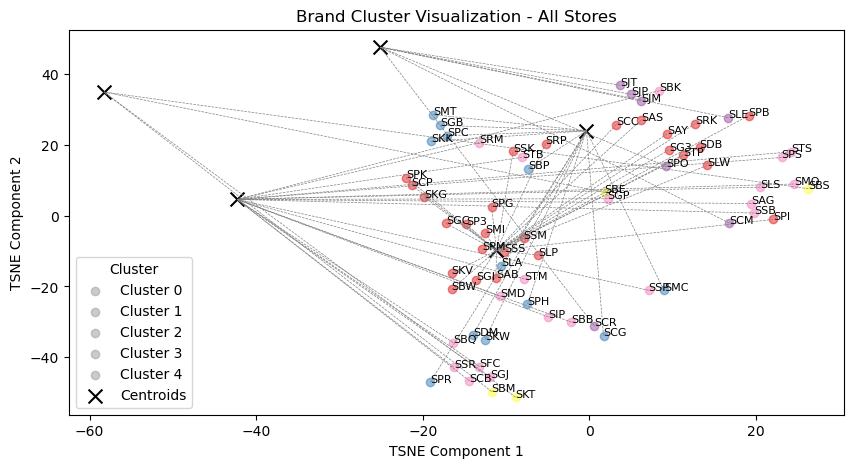

In [ ]:
#visualization

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

float_columns = df_new_aligned.select_dtypes(include=['float64']).columns
X = df_new_aligned[float_columns].values

cluster_labels = df_new_aligned['predicted_cluster'].values
store_alias = df_new_aligned['store_alias'].values
n_clusters = len(np.unique(cluster_labels))

perplexity = 4
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X)
                            
# tambahan centroid - pakai manual calculations

centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])
centroids_tsne = tsne.fit_transform(centroids)

plt.figure(figsize=(10, 5))

# colors = plt.cm.Set1(np.linspace(0,1, n_clusters))
colors = plt.cm.Set1(np.arange(n_clusters) / n_clusters)

# for i, color in enumerate(colors):
for i in range(n_clusters):
    plt.scatter([], [], c=[color], alpha=0.5, label=f'Cluster {i}')


for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], store_alias[i], fontsize=8)  
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], color=[colors[cluster_labels[i]]], alpha=0.5)
    
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color='black', marker='x', s=100, label='Centroids')

for i in range(len(X_tsne)):
    centroid_index = cluster_labels[i]
    plt.plot([X_tsne[i, 0], centroids_tsne[centroid_index, 0]], [X_tsne[i, 1], centroids_tsne[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)


plt.title('Brand Cluster Visualization - All Stores')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()

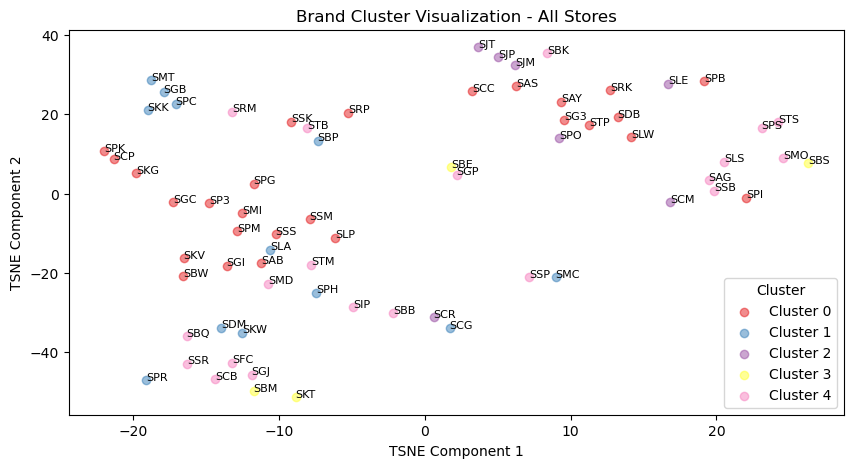

In [ ]:
# Visualization - without centroids

float_columns = df_new_aligned.select_dtypes(include=['float64']).columns
X = df_new_aligned[float_columns].values

cluster_labels = df_new_aligned['predicted_cluster'].values
store_alias = df_new_aligned['store_alias'].values
n_clusters = len(np.unique(cluster_labels))

# Perform TSNE
perplexity = 4
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 5))

# Define a color map that matches cluster labels
colors = plt.cm.Set1(np.arange(n_clusters) / n_clusters)

# Scatter plot for each cluster for the legend
for i in range(n_clusters):
    plt.scatter([], [], c=[colors[i]], alpha=0.5, label=f'Cluster {i}')

# Plot data points
for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], store_alias[i], fontsize=8)  # Display store_alias for each data point
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], color=[colors[cluster_labels[i]]], alpha=0.5)

plt.title('Brand Cluster Visualization - All Stores')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()

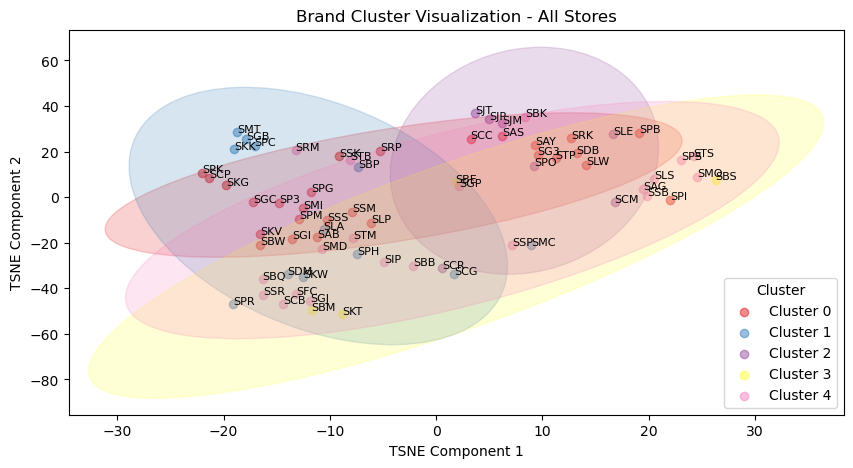

In [ ]:
# Visualization - but with ellipses

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.manifold import TSNE
import numpy as np

# Assuming df_new_aligned is your DataFrame with the aligned columns including 'predicted_cluster' and 'store_alias'
float_columns = df_new_aligned.select_dtypes(include=['float64']).columns
X = df_new_aligned[float_columns].values

cluster_labels = df_new_aligned['predicted_cluster'].values
store_alias = df_new_aligned['store_alias'].values
n_clusters = len(np.unique(cluster_labels))

# Perform TSNE
perplexity = 4
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 5))

# Define a color map that matches cluster labels
colors = plt.cm.Set1(np.arange(n_clusters) / n_clusters)

# Scatter plot for each cluster for the legend
for i in range(n_clusters):
    plt.scatter([], [], c=[colors[i]], alpha=0.5, label=f'Cluster {i}')

# Plot data points
for i in range(len(X_tsne)):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], store_alias[i], fontsize=8)  # Display store_alias for each data point
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], color=[colors[cluster_labels[i]]], alpha=0.5)

# Add ellipses around clusters
for i in range(n_clusters):
    cluster_points = X_tsne[cluster_labels == i]
    if len(cluster_points) > 1:  # Need at least 2 points to define an ellipse
        cov = np.cov(cluster_points, rowvar=False)
        mean = np.mean(cluster_points, axis=0)
        lambda_, v = np.linalg.eigh(cov)
        lambda_ = np.sqrt(lambda_)
        ell = patches.Ellipse(xy=mean, width=lambda_[0]*4, height=lambda_[1]*4,
                              angle=np.degrees(np.arctan2(*v[:, 0][::-1])), color=colors[i], alpha=0.2)
        plt.gca().add_patch(ell)

plt.title('Brand Cluster Visualization - All Stores')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()


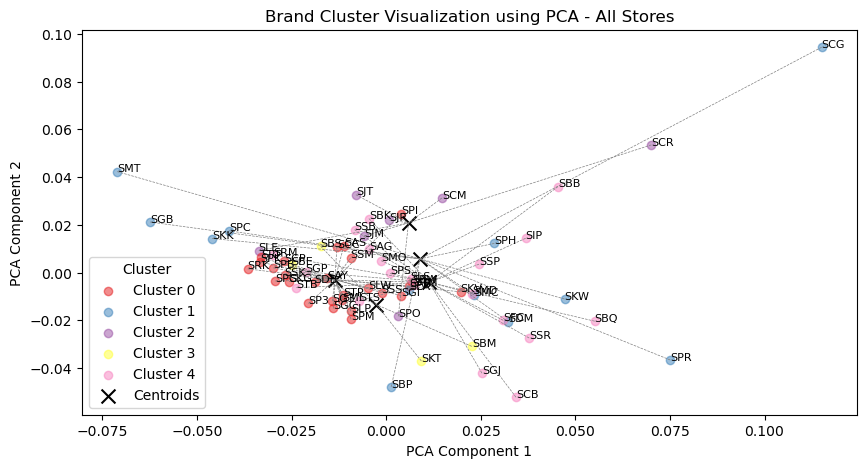

In [ ]:
# if we use PCA instead of TSNE

# Visualization with PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming df_new_aligned is your DataFrame with the aligned columns including 'predicted_cluster' and 'store_alias'
float_columns = df_new_aligned.select_dtypes(include=['float64']).columns
X = df_new_aligned[float_columns].values

cluster_labels = df_new_aligned['predicted_cluster'].values
store_alias = df_new_aligned['store_alias'].values
n_clusters = len(np.unique(cluster_labels))

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Calculate centroids manually
centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 5))

# Define a color map that matches cluster labels
colors = plt.cm.Set1(np.arange(n_clusters) / n_clusters)

# Scatter plot for each cluster for the legend
for i in range(n_clusters):
    plt.scatter([], [], c=[colors[i]], alpha=0.5, label=f'Cluster {i}')

# Plot data points
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0], X_pca[i, 1], store_alias[i], fontsize=8)  # Display store_alias for each data point
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=[colors[cluster_labels[i]]], alpha=0.5)

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='x', s=100, label='Centroids')

# Draw lines from points to centroids
for i in range(len(X_pca)):
    centroid_index = cluster_labels[i]
    plt.plot([X_pca[i, 0], centroids_pca[centroid_index, 0]], [X_pca[i, 1], centroids_pca[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Brand Cluster Visualization using PCA - All Stores')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


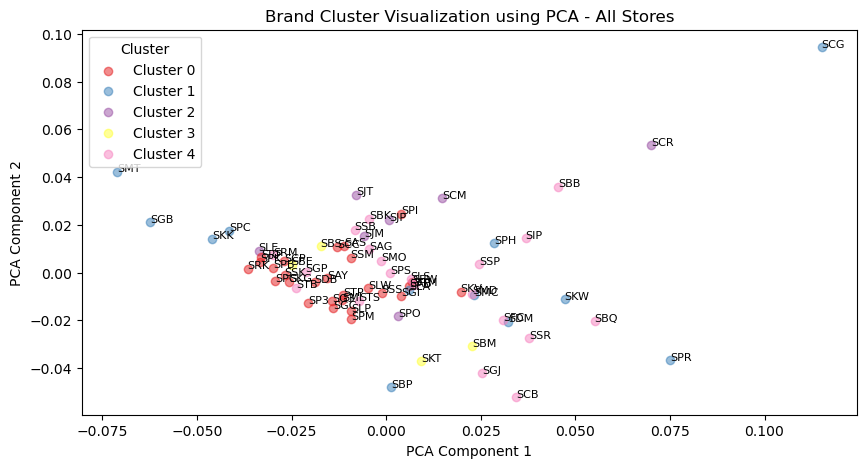

In [ ]:
# if we use PCA instead of TSNE

# Visualization with PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming df_new_aligned is your DataFrame with the aligned columns including 'predicted_cluster' and 'store_alias'
float_columns = df_new_aligned.select_dtypes(include=['float64']).columns
X = df_new_aligned[float_columns].values

cluster_labels = df_new_aligned['predicted_cluster'].values
store_alias = df_new_aligned['store_alias'].values
n_clusters = len(np.unique(cluster_labels))

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Calculate centroids manually
centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 5))

# Define a color map that matches cluster labels
colors = plt.cm.Set1(np.arange(n_clusters) / n_clusters)

# Scatter plot for each cluster for the legend
for i in range(n_clusters):
    plt.scatter([], [], c=[colors[i]], alpha=0.5, label=f'Cluster {i}')

# Plot data points
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0], X_pca[i, 1], store_alias[i], fontsize=8)  # Display store_alias for each data point
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=[colors[cluster_labels[i]]], alpha=0.5)

# Plot centroids
# plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='x', s=100, label='Centroids')

# Draw lines from points to centroids
# for i in range(len(X_pca)):
#     centroid_index = cluster_labels[i]
#     plt.plot([X_pca[i, 0], centroids_pca[centroid_index, 0]], [X_pca[i, 1], centroids_pca[centroid_index, 1]], color='gray', linestyle='--', linewidth=0.5)

plt.title('Brand Cluster Visualization using PCA - All Stores')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
